# Fashion-MNIST Bildgenerierung: GAN vs. VAE

Dieses Notebook implementiert und vergleicht zwei generative Modelle (GAN und VAE) für die Fashion-MNIST-Bildgenerierung. Du kannst per Auswahl das Modell bestimmen und die generierten Bilder direkt visualisieren.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from IPython.display import display
import ipywidgets as widgets

In [2]:
# Einfaches GAN für Fashion-MNIST
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Tanh()
        )
    def forward(self, z):
        img = self.model(z)
        return img.view(z.size(0), 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        return self.model(img_flat)

In [3]:
# Einfacher VAE für Fashion-MNIST
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super().__init__()
        self.fc1 = nn.Linear(784, 400)
        self.fc21 = nn.Linear(400, latent_dim)
        self.fc22 = nn.Linear(400, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 784)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    def decode(self, z):
        h3 = self.relu(self.fc3(z))
        return self.sigmoid(self.fc4(h3))
    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [4]:
# Modell-Auswahl per Dropdown
model_selector = widgets.Dropdown(
    options=['GAN', 'VAE'],
    value='GAN',
    description='Modell:',
    disabled=False,
)
display(model_selector)

Dropdown(description='Modell:', options=('GAN', 'VAE'), value='GAN')

Starte Daten-Download...
Daten-Download abgeschlossen.
Daten-Loader bereit.
Starte Endgenerierung...
Starte Generierung mit Modell: GAN
Starte GAN-Training...


[GAN] Epoch 1/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 1/20 abgeschlossen | D loss: 0.0975 | G loss: 2.3680


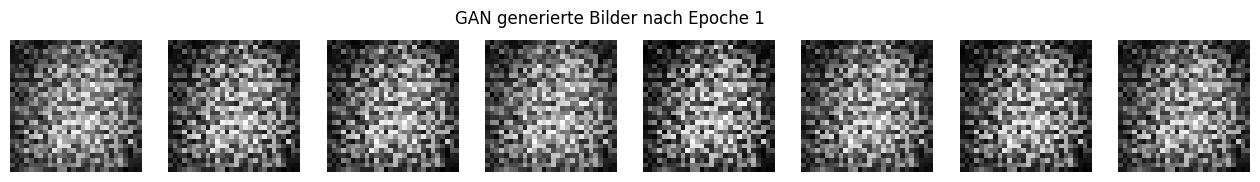

[GAN] Epoch 2/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 2/20 abgeschlossen | D loss: 0.0353 | G loss: 3.0103


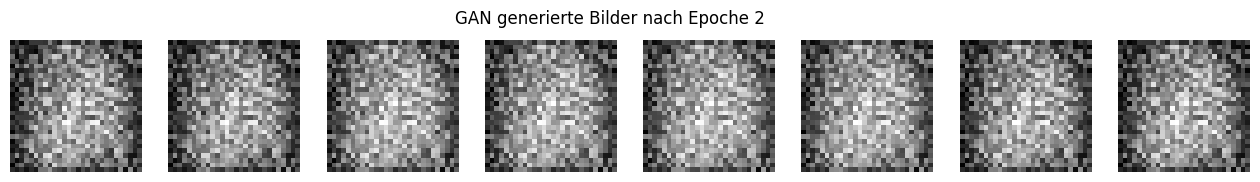

[GAN] Epoch 3/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 3/20 abgeschlossen | D loss: 0.0077 | G loss: 4.8135


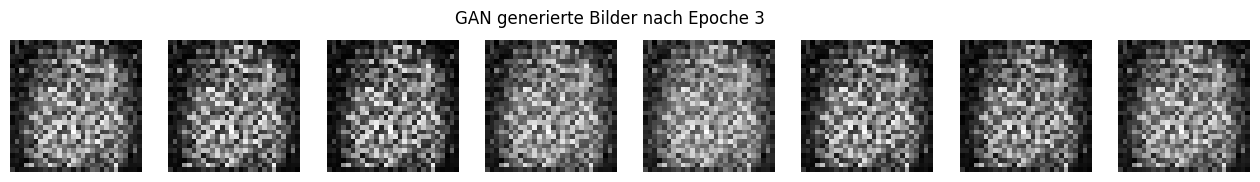

[GAN] Epoch 4/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 4/20 abgeschlossen | D loss: 0.0177 | G loss: 7.3473


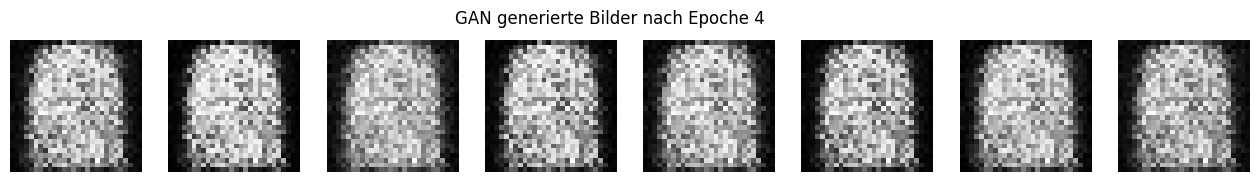

[GAN] Epoch 5/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 5/20 abgeschlossen | D loss: 0.0472 | G loss: 5.0621


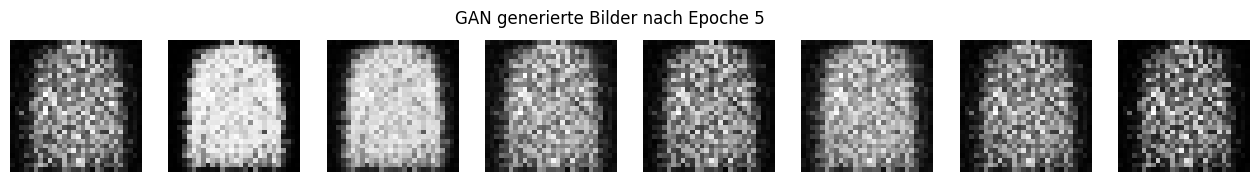

[GAN] Epoch 6/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 6/20 abgeschlossen | D loss: 0.0542 | G loss: 5.1647


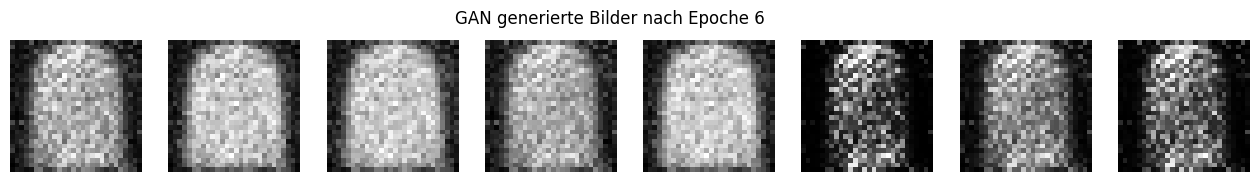

[GAN] Epoch 7/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 7/20 abgeschlossen | D loss: 0.0239 | G loss: 6.1259


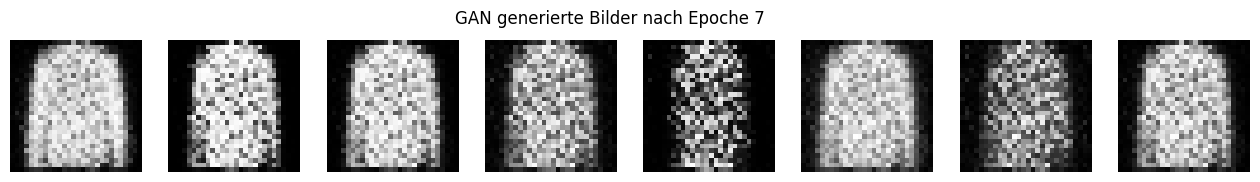

[GAN] Epoch 8/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 8/20 abgeschlossen | D loss: 0.0397 | G loss: 4.4322


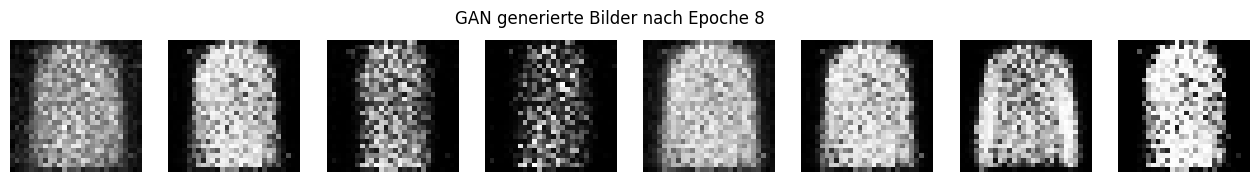

[GAN] Epoch 9/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 9/20 abgeschlossen | D loss: 0.0298 | G loss: 4.1650


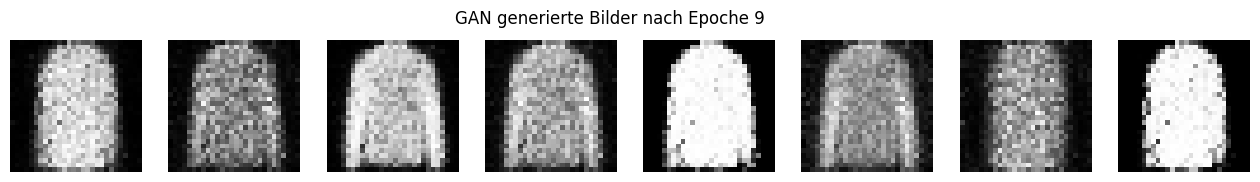

[GAN] Epoch 10/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 10/20 abgeschlossen | D loss: 0.0038 | G loss: 7.0272


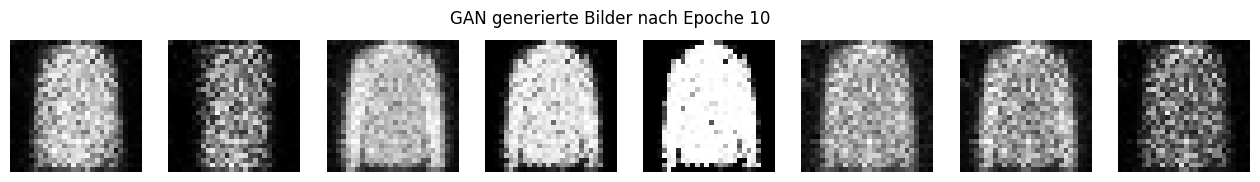

[GAN] Epoch 11/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 11/20 abgeschlossen | D loss: 0.0407 | G loss: 4.8558


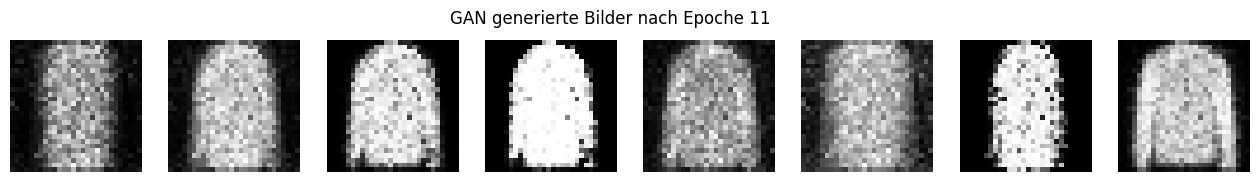

[GAN] Epoch 12/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 12/20 abgeschlossen | D loss: 0.0565 | G loss: 4.8619


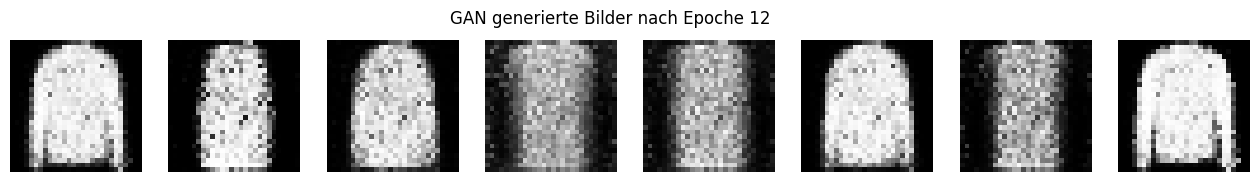

[GAN] Epoch 13/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 13/20 abgeschlossen | D loss: 0.0779 | G loss: 3.9506


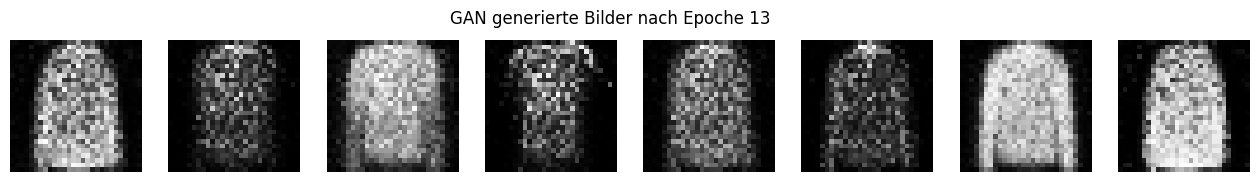

[GAN] Epoch 14/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 14/20 abgeschlossen | D loss: 0.0978 | G loss: 4.7760


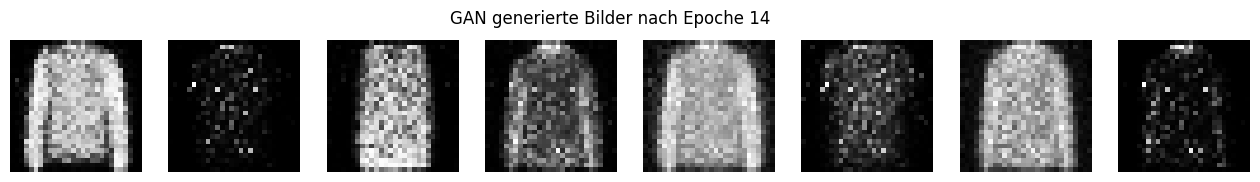

[GAN] Epoch 15/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 15/20 abgeschlossen | D loss: 0.0262 | G loss: 4.4678


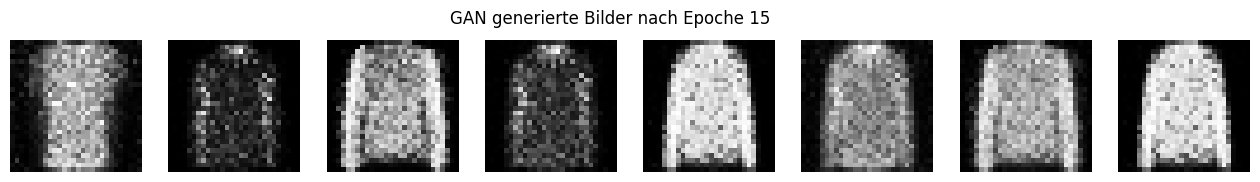

[GAN] Epoch 16/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 16/20 abgeschlossen | D loss: 0.0400 | G loss: 4.7503


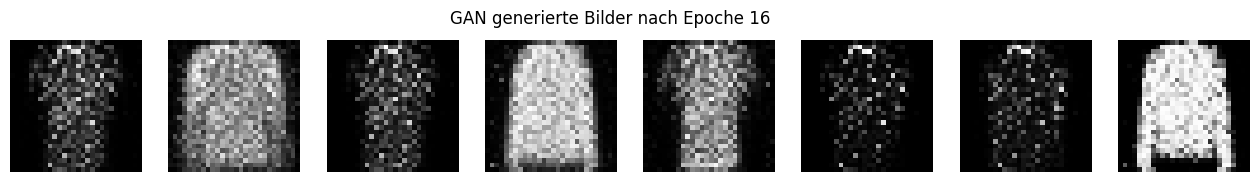

[GAN] Epoch 17/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 17/20 abgeschlossen | D loss: 0.0345 | G loss: 3.8675


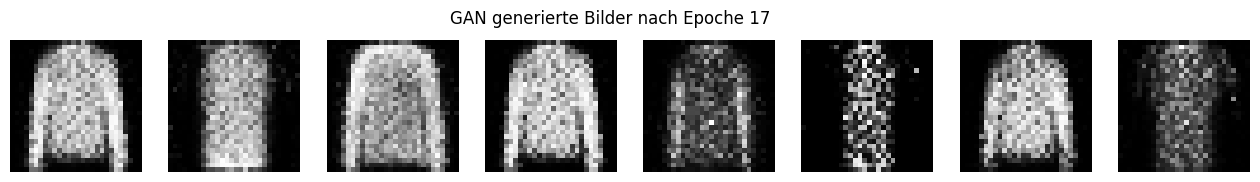

[GAN] Epoch 18/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 18/20 abgeschlossen | D loss: 0.1381 | G loss: 4.8262


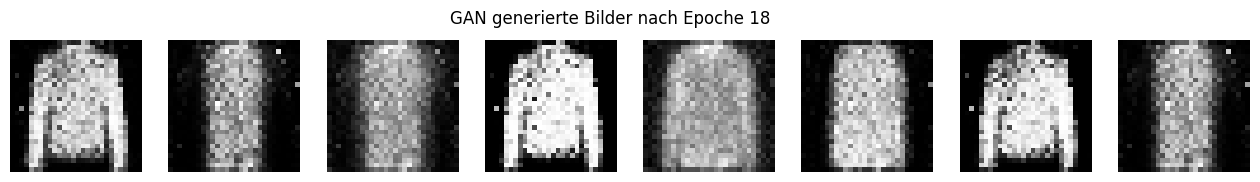

[GAN] Epoch 19/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 19/20 abgeschlossen | D loss: 0.0893 | G loss: 3.6745


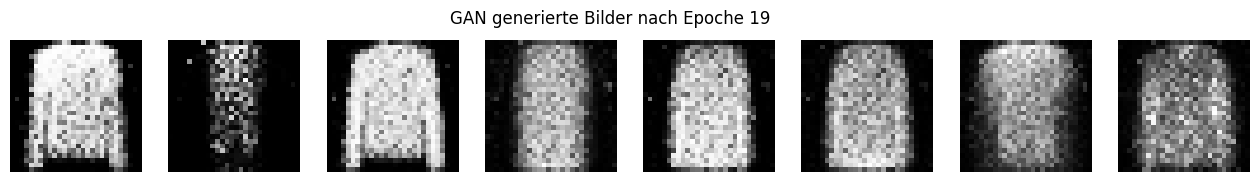

[GAN] Epoch 20/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 20/20 abgeschlossen | D loss: 0.1489 | G loss: 5.0287


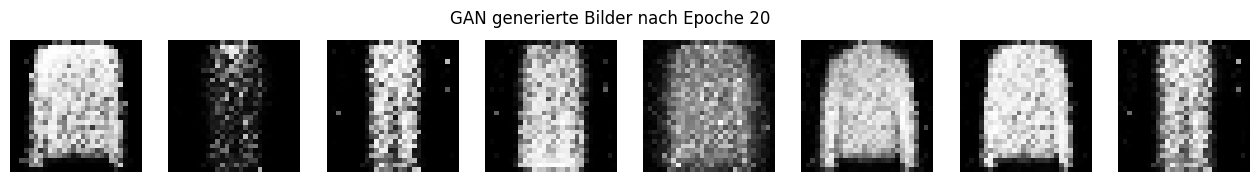

GAN-Training abgeschlossen.
Generierung abgeschlossen. Es wurden 8 Bilder erzeugt.
Fertig!


In [8]:
# Daten laden
from tqdm.notebook import tqdm
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
print("Starte Daten-Download...")
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
print("Daten-Download abgeschlossen.")
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
print("Daten-Loader bereit.")

def show_sample_images(images, title):
    fig, axes = plt.subplots(1, min(8, len(images)), figsize=(16,2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i][0], cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

def train_gan(epochs=1, latent_dim=100):
    print("Starte GAN-Training...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    G = Generator(latent_dim).to(device)
    D = Discriminator().to(device)
    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
    optimizer_D = optim.Adam(D.parameters(), lr=0.0002)
    for epoch in range(epochs):
        pbar = tqdm(trainloader, desc=f"[GAN] Epoch {epoch+1}/{epochs}")
        for imgs, _ in pbar:
            imgs = imgs.to(device)
            valid = torch.ones(imgs.size(0), 1, device=device)
            fake = torch.zeros(imgs.size(0), 1, device=device)
            # Train Generator
            optimizer_G.zero_grad()
            z = torch.randn(imgs.size(0), latent_dim, device=device)
            gen_imgs = G(z)
            g_loss = criterion(D(gen_imgs), valid)
            g_loss.backward()
            optimizer_G.step()
            # Train Discriminator
            optimizer_D.zero_grad()
            real_loss = criterion(D(imgs), valid)
            fake_loss = criterion(D(gen_imgs.detach()), fake)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()
            pbar.set_postfix({"D_loss": d_loss.item(), "G_loss": g_loss.item()})
        print(f"[GAN] Epoch {epoch+1}/{epochs} abgeschlossen | D loss: {d_loss.item():.4f} | G loss: {g_loss.item():.4f}")
        # Zeige Beispielbilder nach jeder Epoche
        with torch.no_grad():
            z = torch.randn(8, latent_dim, device=device)
            sample_imgs = G(z).cpu().detach().numpy()
            sample_imgs = (sample_imgs + 1) / 2
            show_sample_images(sample_imgs, f"GAN generierte Bilder nach Epoche {epoch+1}")
    print("GAN-Training abgeschlossen.")
    return G

def train_vae(epochs=1, latent_dim=20):
    print("Starte VAE-Training...")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    vae = VAE(latent_dim).to(device)
    optimizer = optim.Adam(vae.parameters(), lr=0.001)
    def loss_fn(recon_x, x, mu, logvar):
        BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return BCE + KLD
    for epoch in range(epochs):
        pbar = tqdm(trainloader, desc=f"[VAE] Epoch {epoch+1}/{epochs}")
        for imgs, _ in pbar:
            imgs = imgs.to(device)
            imgs_flat = imgs.view(-1, 784)
            optimizer.zero_grad()
            recon, mu, logvar = vae(imgs_flat)
            loss = loss_fn(recon, imgs_flat, mu, logvar)
            loss.backward()
            optimizer.step()
            pbar.set_postfix({"Loss": loss.item()})
        print(f"[VAE] Epoch {epoch+1}/{epochs} abgeschlossen | Loss: {loss.item():.4f}")
        # Zeige Beispielbilder nach jeder Epoche
        with torch.no_grad():
            z = torch.randn(8, latent_dim, device=device)
            sample_imgs = vae.decode(z).cpu().detach().numpy().reshape(-1, 1, 28, 28)
            show_sample_images(sample_imgs, f"VAE generierte Bilder nach Epoche {epoch+1}")
    print("VAE-Training abgeschlossen.")
    return vae

def generate_images(model_type, n=8):
    print(f"Starte Generierung mit Modell: {model_type}")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if model_type == 'GAN':
        G = train_gan(epochs=20)
        z = torch.randn(n, 100, device=device)
        gen_imgs = G(z).cpu().detach().numpy()
        gen_imgs = (gen_imgs + 1) / 2  # Rescale to [0,1]
    else:
        vae = train_vae(epochs=20)
        z = torch.randn(n, 20, device=device)
        gen_imgs = vae.decode(z).cpu().detach().numpy().reshape(-1, 1, 28, 28)
    print(f"Generierung abgeschlossen. Es wurden {n} Bilder erzeugt.")
    return gen_imgs

# Modell wählen und Bilder generieren
print("Starte Endgenerierung...")
gen_imgs = generate_images(model_selector.value, n=8)
print("Fertig!")

In [ ]:
# Visualisierung der generierten Bilder
fig, axes = plt.subplots(1, 8, figsize=(16,2))
for i, ax in enumerate(axes):
    ax.imshow(gen_imgs[i][0], cmap='gray')
    ax.axis('off')
plt.suptitle(f'Generierte Bilder mit {model_selector.value}')
plt.show()

In [26]:
# --- Bild-Upload und Einstellungen (separat ausführen, dann nächste Zelle für Generierung) ---
from PIL import Image
import io
from skimage.transform import resize
import ipywidgets as widgets
from IPython.display import display

# Datei-Upload-Widget für beliebiges Bild
guide = widgets.HTML('<b>1. Bild hochladen (PNG/JPG):</b>')
upload_widget = widgets.FileUpload(accept='.png,.jpg,.jpeg', multiple=False, description='Bild hochladen')
display(guide, upload_widget)

# Dropdown für Klasse (GAN)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
class_selector = widgets.Dropdown(options=class_names, value='T-shirt/top', description='Klasse (GAN):')
display(widgets.HTML('<b>2. Klasse für GAN wählen:</b>'), class_selector)

def preprocess_uploaded_image(uploaded_file):
    # Lädt und skaliert das Bild auf 28x28, normalisiert auf [-1,1] (GAN) und [0,1] (VAE)
    img = Image.open(io.BytesIO(uploaded_file)).convert('L')
    img = img.resize((28, 28))
    img_np = np.array(img, dtype=np.float32) / 255.0
    img_vae = img_np[np.newaxis, :, :]  # (1, 28, 28), [0,1]
    img_gan = (img_np * 2 - 1)[np.newaxis, :, :]  # (1, 28, 28), [-1,1]
    return img_vae, img_gan

def upscale_image(img, scale=4):
    img = img.squeeze()
    upscaled = resize(img, (img.shape[0]*scale, img.shape[1]*scale), order=3, mode='reflect', anti_aliasing=True)
    return upscaled


HTML(value='<b>1. Bild hochladen (PNG/JPG):</b>')

FileUpload(value=(), accept='.png,.jpg,.jpeg', description='Bild hochladen')

HTML(value='<b>2. Klasse für GAN wählen:</b>')

Dropdown(description='Klasse (GAN):', options=('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal'…

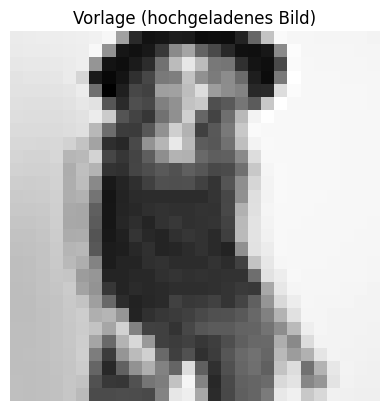

Generiere ähnliche Outfits mit VAE...
Starte VAE-Training...


[VAE] Epoch 1/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 1/20 abgeschlossen | Loss: 25161.1719


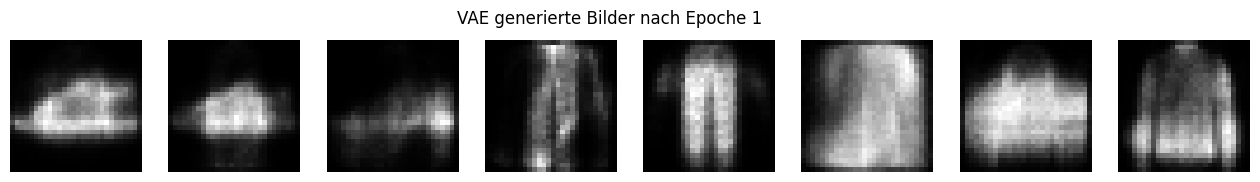

[VAE] Epoch 2/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 2/20 abgeschlossen | Loss: 24232.2090


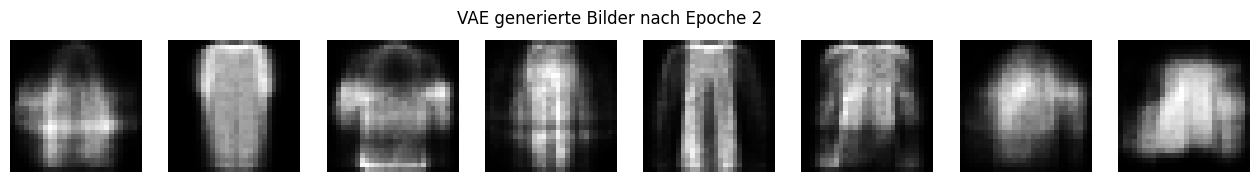

[VAE] Epoch 3/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 3/20 abgeschlossen | Loss: 22531.0430


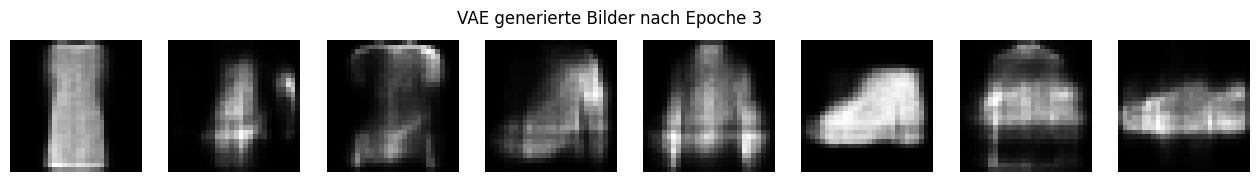

[VAE] Epoch 4/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 4/20 abgeschlossen | Loss: 23643.6328


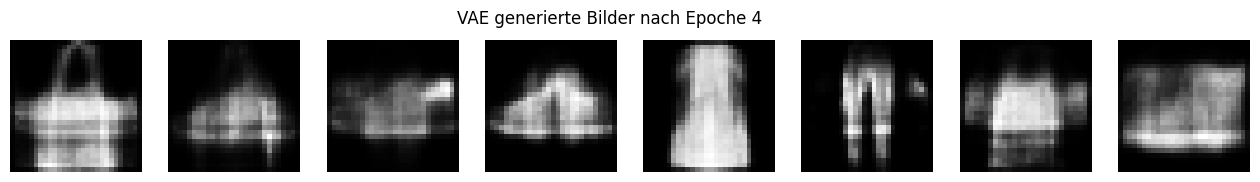

[VAE] Epoch 5/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 5/20 abgeschlossen | Loss: 24004.5469


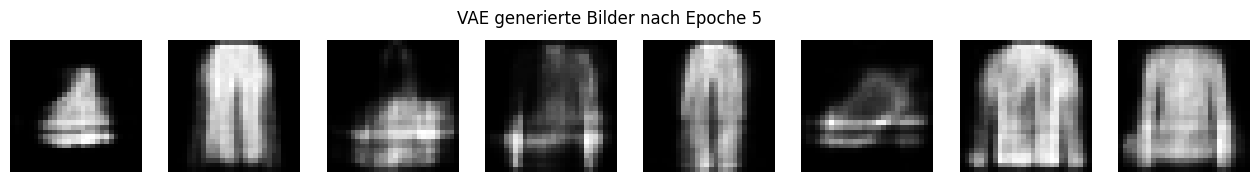

[VAE] Epoch 6/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 6/20 abgeschlossen | Loss: 22835.9297


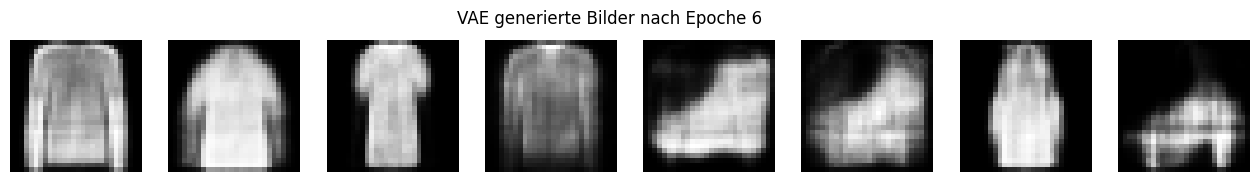

[VAE] Epoch 7/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 7/20 abgeschlossen | Loss: 23285.5020


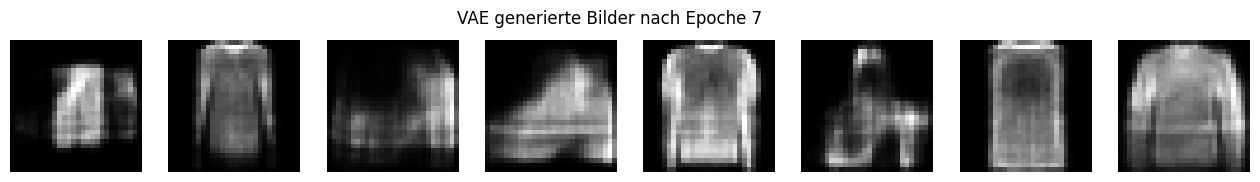

[VAE] Epoch 8/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 8/20 abgeschlossen | Loss: 22574.7051


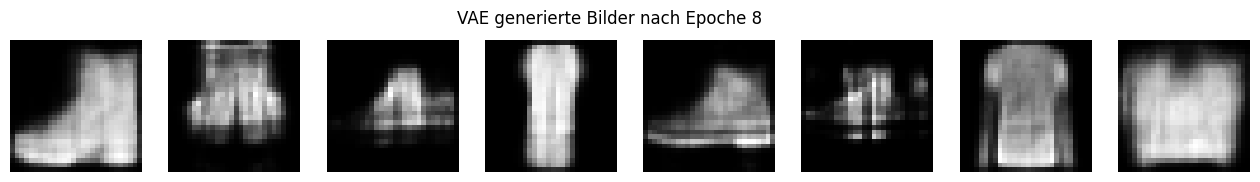

[VAE] Epoch 9/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 9/20 abgeschlossen | Loss: 24348.9512


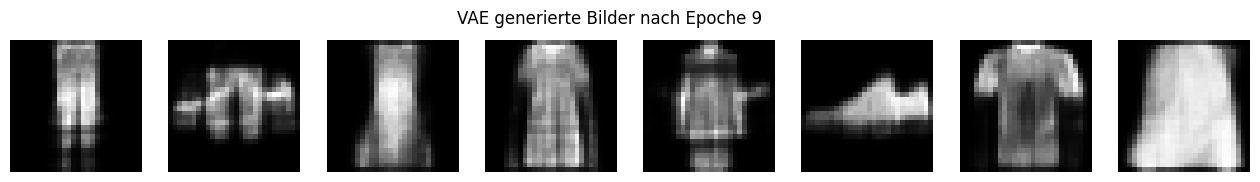

[VAE] Epoch 10/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 10/20 abgeschlossen | Loss: 23904.6562


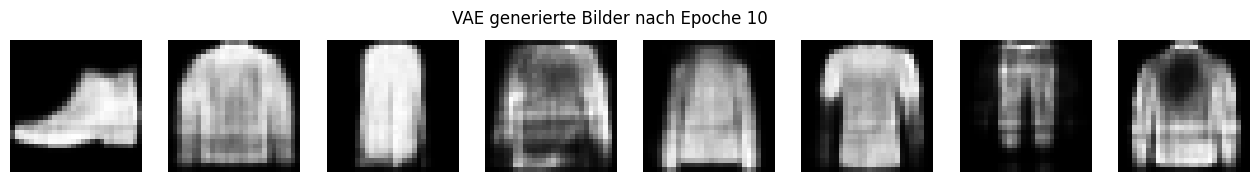

[VAE] Epoch 11/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 11/20 abgeschlossen | Loss: 23605.5156


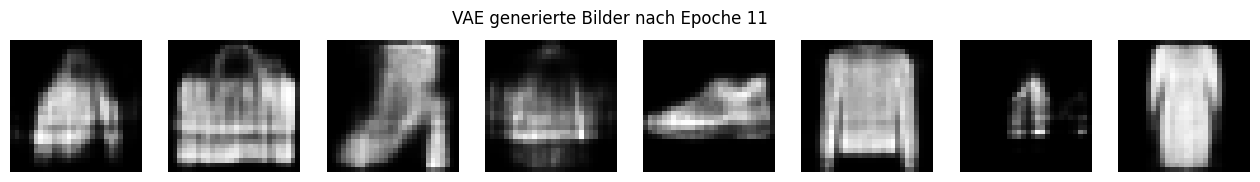

[VAE] Epoch 12/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 12/20 abgeschlossen | Loss: 23553.2598


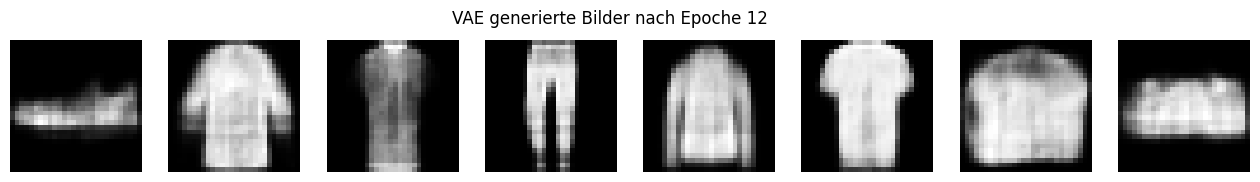

[VAE] Epoch 13/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 13/20 abgeschlossen | Loss: 22915.1758


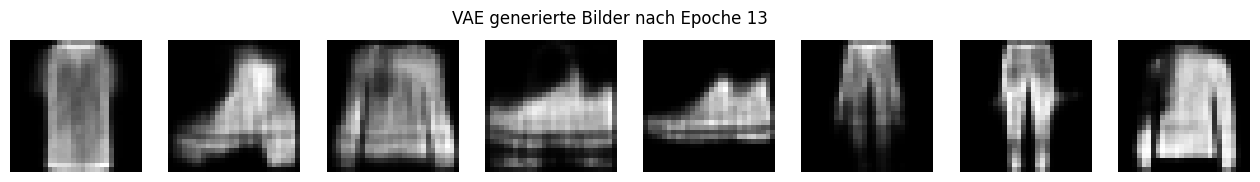

[VAE] Epoch 14/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 14/20 abgeschlossen | Loss: 23602.8906


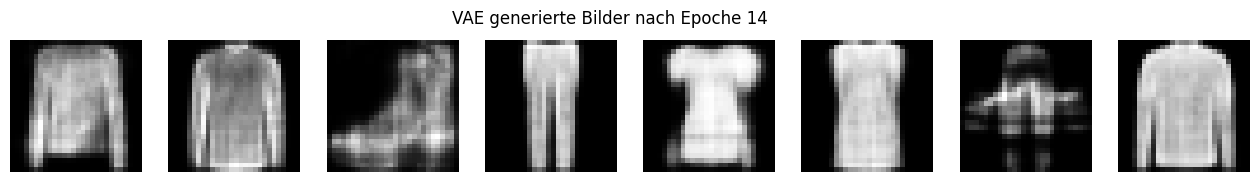

[VAE] Epoch 15/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 15/20 abgeschlossen | Loss: 22928.9297


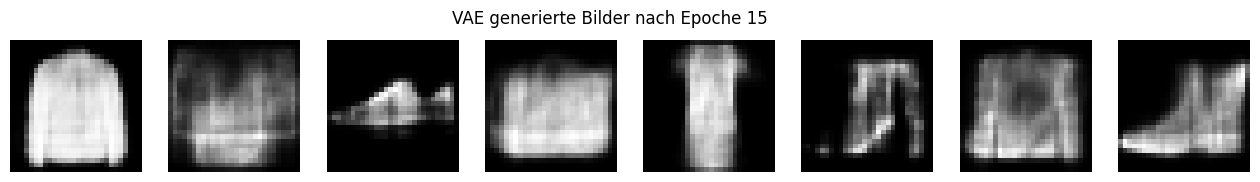

[VAE] Epoch 16/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 16/20 abgeschlossen | Loss: 23010.3203


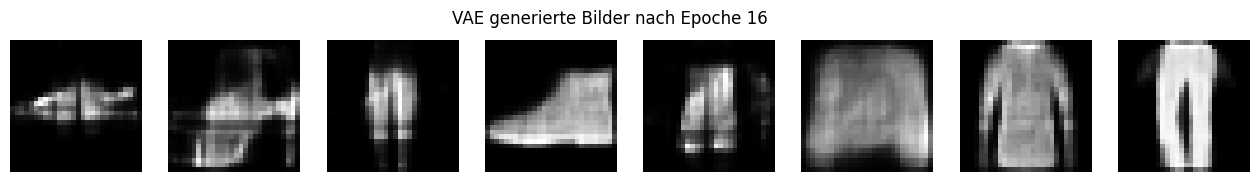

[VAE] Epoch 17/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 17/20 abgeschlossen | Loss: 22642.2363


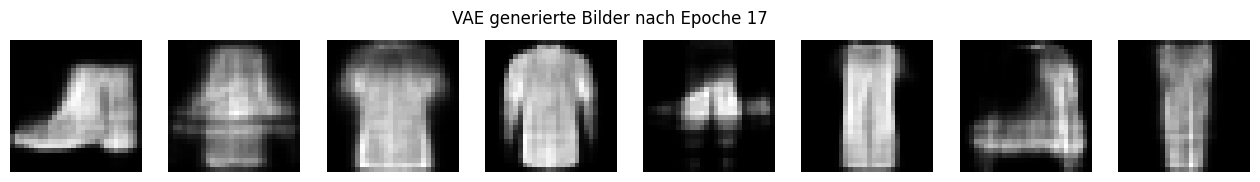

[VAE] Epoch 18/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 18/20 abgeschlossen | Loss: 22878.7480


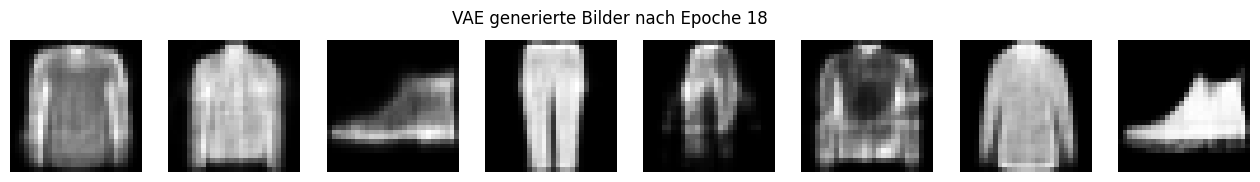

[VAE] Epoch 19/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 19/20 abgeschlossen | Loss: 23772.6211


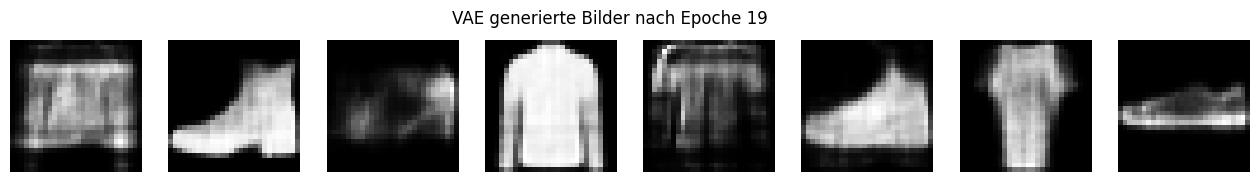

[VAE] Epoch 20/20:   0%|          | 0/469 [00:00<?, ?it/s]

[VAE] Epoch 20/20 abgeschlossen | Loss: 22513.5293


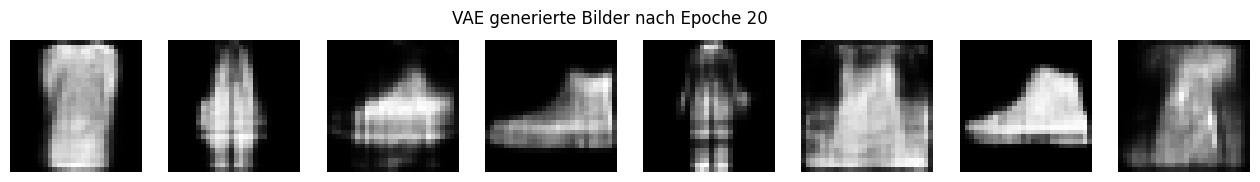

VAE-Training abgeschlossen.


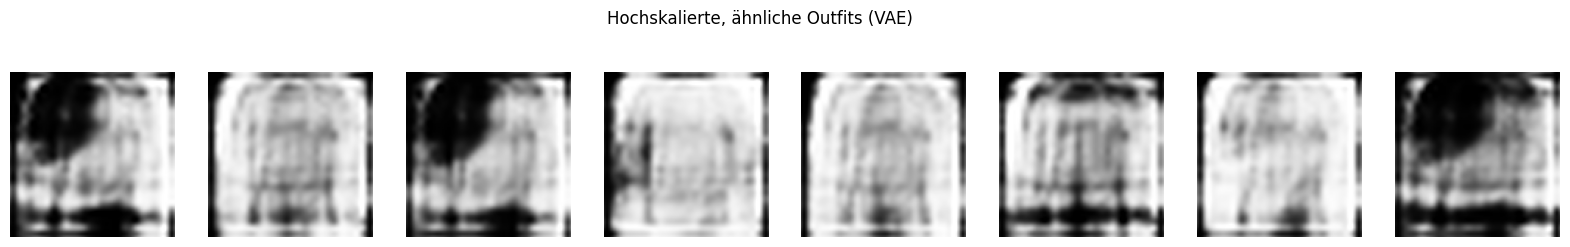

Generiere Outfits mit GAN für Klasse: T-shirt/top
Starte GAN-Training...


[GAN] Epoch 1/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 1/20 abgeschlossen | D loss: 0.0547 | G loss: 2.9754


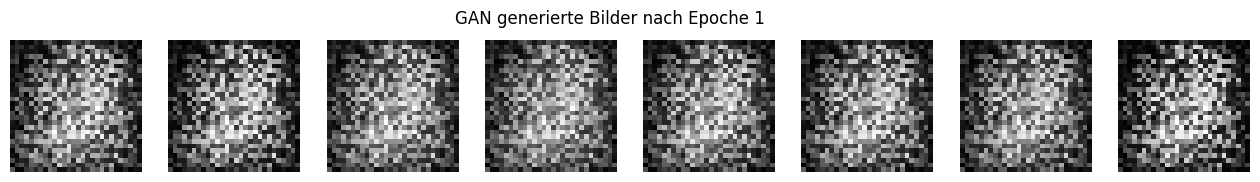

[GAN] Epoch 2/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 2/20 abgeschlossen | D loss: 0.0238 | G loss: 4.3827


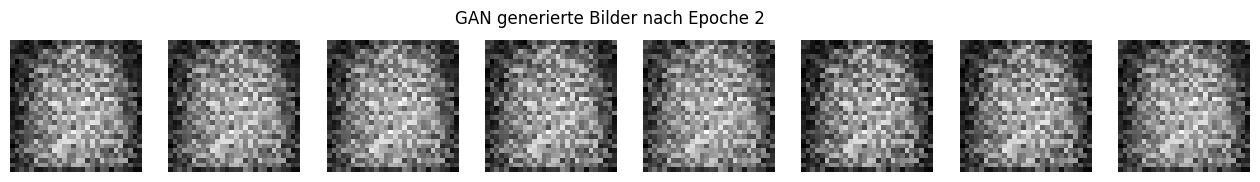

[GAN] Epoch 3/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 3/20 abgeschlossen | D loss: 0.0164 | G loss: 5.4572


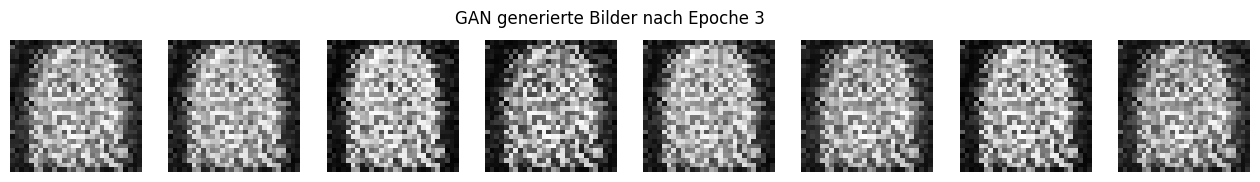

[GAN] Epoch 4/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 4/20 abgeschlossen | D loss: 0.0224 | G loss: 5.3499


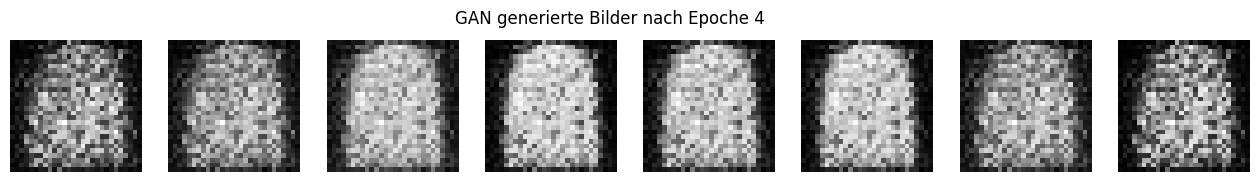

[GAN] Epoch 5/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 5/20 abgeschlossen | D loss: 0.0335 | G loss: 3.7124


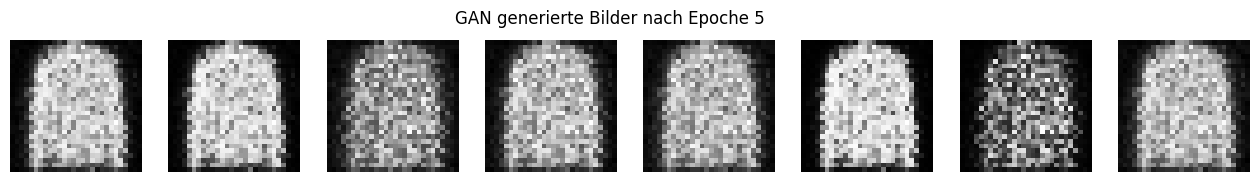

[GAN] Epoch 6/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 6/20 abgeschlossen | D loss: 0.0234 | G loss: 5.1196


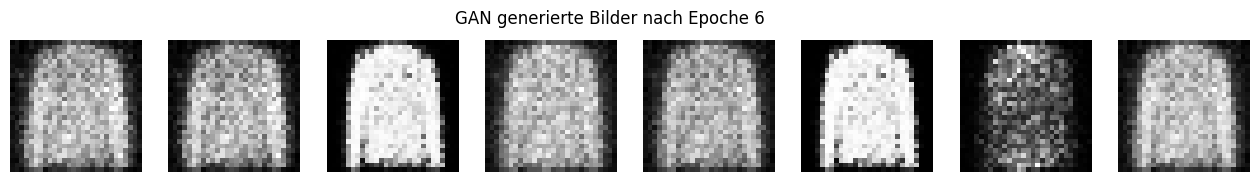

[GAN] Epoch 7/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 7/20 abgeschlossen | D loss: 0.0084 | G loss: 5.9865


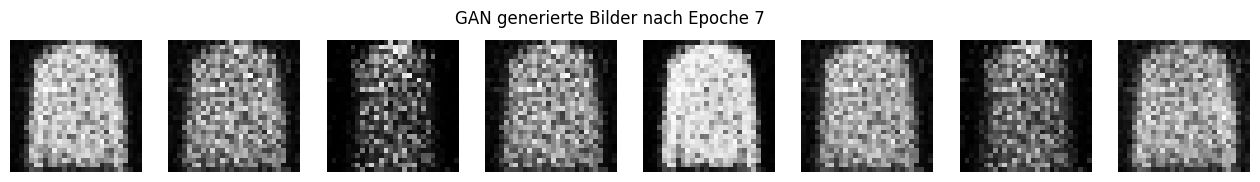

[GAN] Epoch 8/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 8/20 abgeschlossen | D loss: 0.0263 | G loss: 4.0333


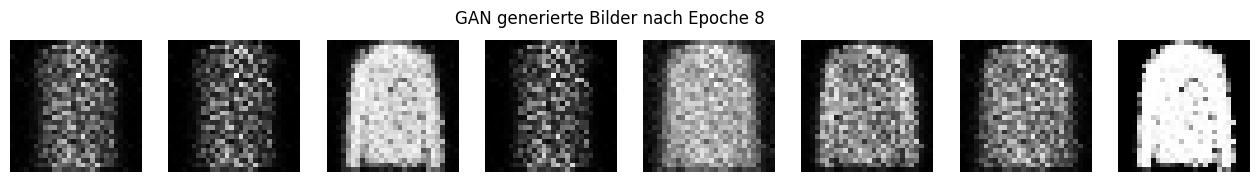

[GAN] Epoch 9/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 9/20 abgeschlossen | D loss: 0.0276 | G loss: 6.4669


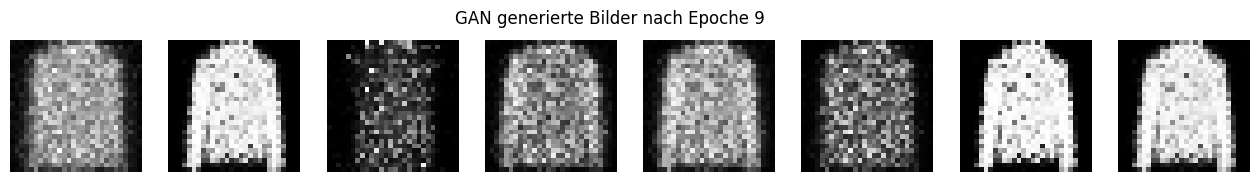

[GAN] Epoch 10/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 10/20 abgeschlossen | D loss: 0.0537 | G loss: 5.2017


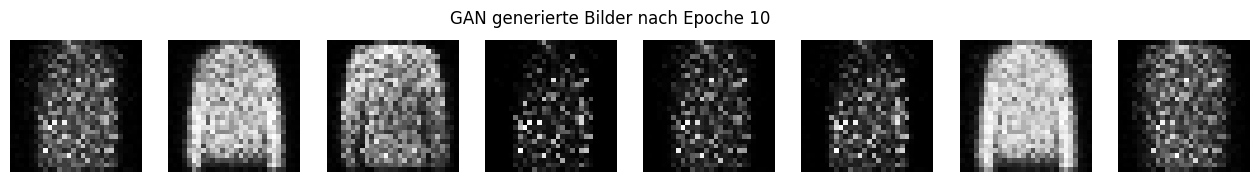

[GAN] Epoch 11/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 11/20 abgeschlossen | D loss: 0.0949 | G loss: 3.6098


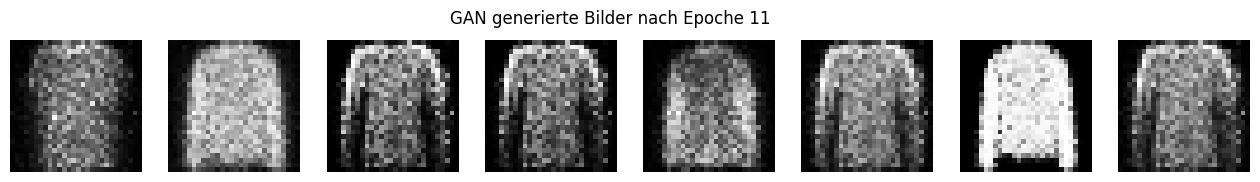

[GAN] Epoch 12/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 12/20 abgeschlossen | D loss: 0.0851 | G loss: 4.8025


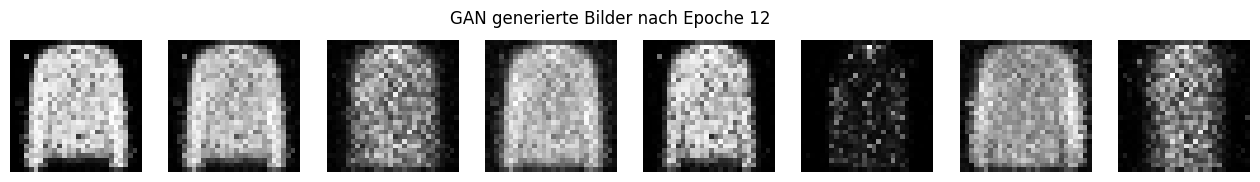

[GAN] Epoch 13/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 13/20 abgeschlossen | D loss: 0.1105 | G loss: 3.8273


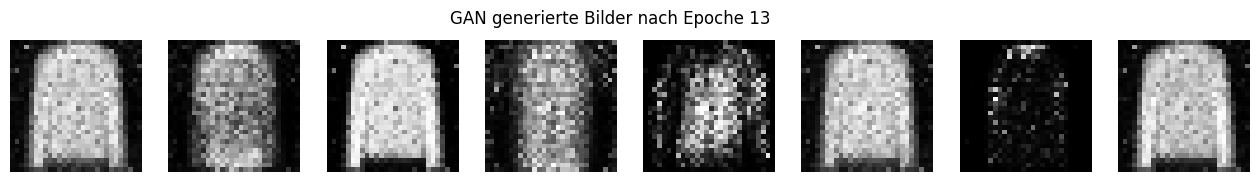

[GAN] Epoch 14/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 14/20 abgeschlossen | D loss: 0.0697 | G loss: 3.1278


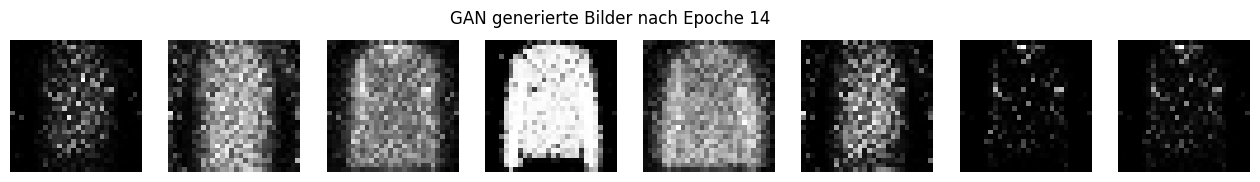

[GAN] Epoch 15/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 15/20 abgeschlossen | D loss: 0.0306 | G loss: 4.1153


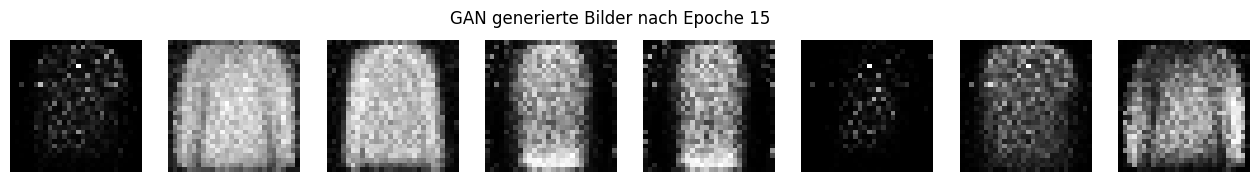

[GAN] Epoch 16/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 16/20 abgeschlossen | D loss: 0.1529 | G loss: 2.9274


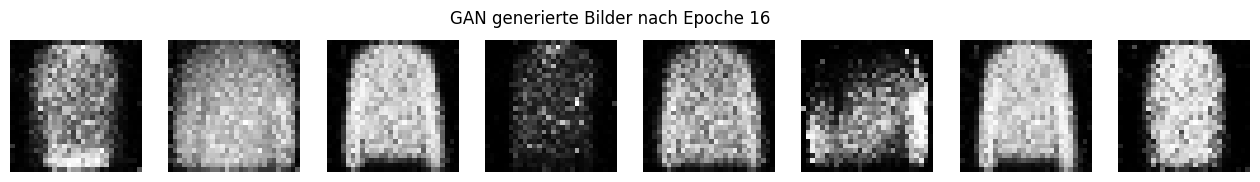

[GAN] Epoch 17/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 17/20 abgeschlossen | D loss: 0.1547 | G loss: 2.9963


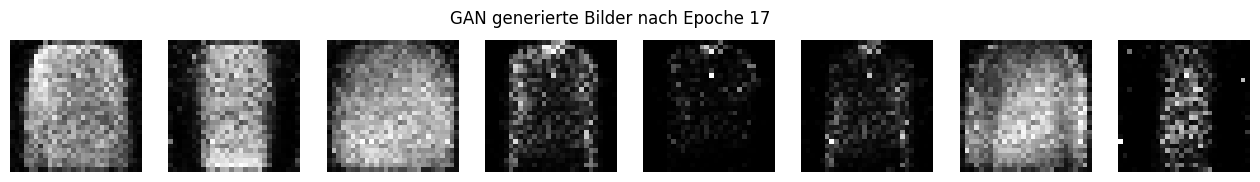

[GAN] Epoch 18/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 18/20 abgeschlossen | D loss: 0.1616 | G loss: 3.2614


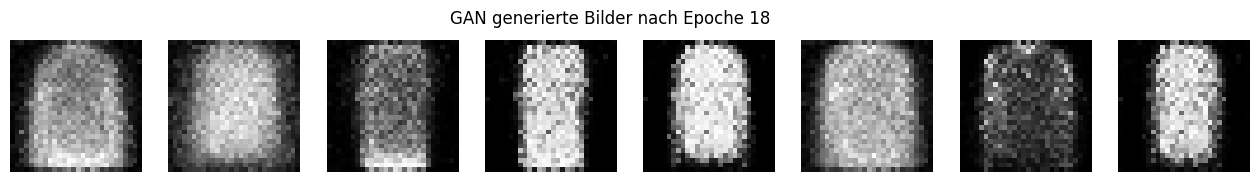

[GAN] Epoch 19/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 19/20 abgeschlossen | D loss: 0.1205 | G loss: 4.5255


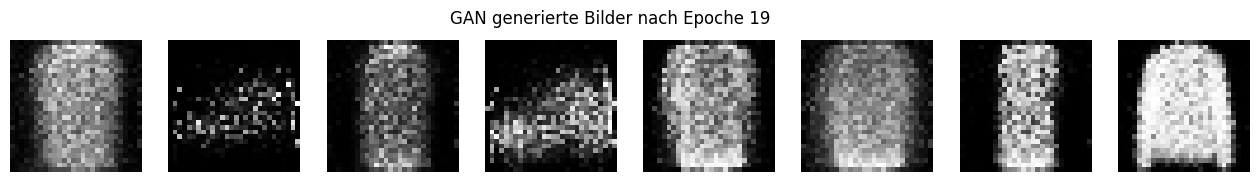

[GAN] Epoch 20/20:   0%|          | 0/469 [00:00<?, ?it/s]

[GAN] Epoch 20/20 abgeschlossen | D loss: 0.1100 | G loss: 3.1953


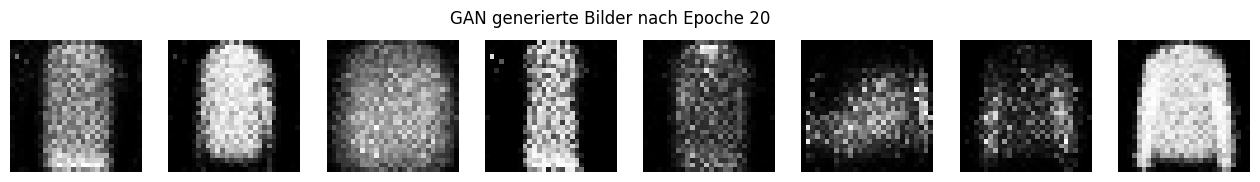

GAN-Training abgeschlossen.


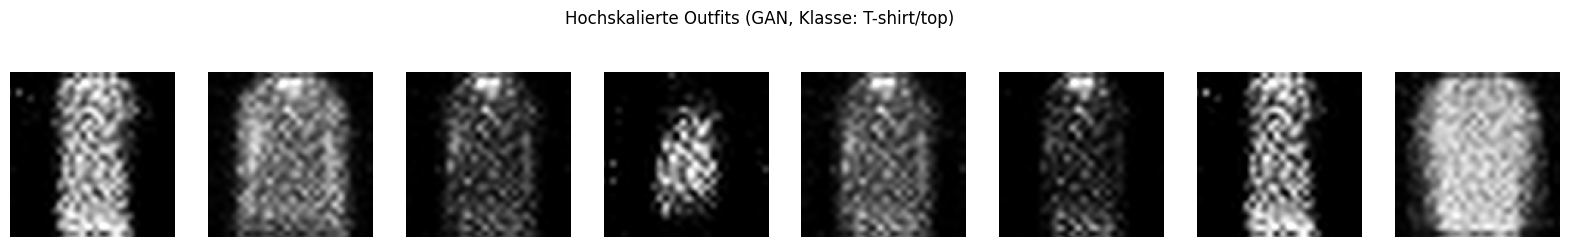

In [32]:
# --- Generierung: Bild verarbeiten und Outfits erzeugen (nach Upload/Einstellung ausführen) ---
import numpy as np
import matplotlib.pyplot as plt
import torch

# Prüfe, ob ein Bild hochgeladen wurde
if len(upload_widget.value) == 0:
    print('Bitte zuerst ein Bild hochladen und Klasse wählen!')
else:
    uploaded_file = upload_widget.value[0]['content']
    img_vae, img_gan = preprocess_uploaded_image(uploaded_file)
    # Zeige das hochgeladene Bild
    plt.imshow(img_vae[0], cmap='gray')
    plt.title('Vorlage (hochgeladenes Bild)')
    plt.axis('off')
    plt.show()

    def train_vae_with_loader(dataloader, epochs=1, latent_dim=20):
        print("Starte VAE-Training...")
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        vae = VAE(latent_dim).to(device)
        optimizer = optim.Adam(vae.parameters(), lr=0.001)
        def loss_fn(recon_x, x, mu, logvar):
            BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
            KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            return BCE + KLD
        for epoch in range(epochs):
            pbar = tqdm(dataloader, desc=f"[VAE] Epoch {epoch+1}/{epochs}")
            for imgs, _ in pbar:
                imgs = imgs.to(device)
                optimizer.zero_grad()
                recon, mu, logvar = vae(imgs)
                loss = loss_fn(recon, imgs, mu, logvar)
                loss.backward()
                optimizer.step()
                pbar.set_postfix({"Loss": loss.item()})
            print(f"[VAE] Epoch {epoch+1}/{epochs} abgeschlossen | Loss: {loss.item():.4f}")
            # Zeige Beispielbilder nach jeder Epoche
            with torch.no_grad():
                z = torch.randn(8, latent_dim, device=device)
                sample_imgs = vae.decode(z).cpu().detach().numpy().reshape(-1, 1, 28, 28)
                show_sample_images(sample_imgs, f"VAE generierte Bilder nach Epoche {epoch+1}")
        print("VAE-Training abgeschlossen.")
        return vae

    def generate_similar_images(input_img, model_type='VAE', n=8, upscale=True, class_idx=0):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        if model_type == 'VAE':
            # Create a custom transform for VAE that normalizes to [0, 1]
            vae_transform = transforms.Compose([
                transforms.ToTensor()
            ])
            # Reload data with VAE-appropriate normalization
            vae_trainset = datasets.FashionMNIST(root='./data', train=True, download=False, transform=vae_transform)
            vae_trainloader = DataLoader(vae_trainset, batch_size=128, shuffle=True)
            # Train VAE with proper data
            vae = train_vae_with_loader(vae_trainloader, epochs=20)
            input_tensor = torch.tensor(input_img, dtype=torch.float32).unsqueeze(0).to(device)
            input_tensor = input_tensor.view(-1, 784)
            with torch.no_grad():
                mu, logvar = vae.encode(input_tensor)
                z_samples = mu + 0.5 * torch.randn(n, mu.shape[1], device=device)
                gen_imgs = vae.decode(z_samples).cpu().detach().numpy().reshape(-1, 1, 28, 28)
                gen_imgs = np.clip(gen_imgs, 0, 1)
        elif model_type == 'GAN':
            G = train_gan(epochs=20)
            latent_dim = 100
            np.random.seed(class_idx)
            torch.manual_seed(class_idx)
            z = torch.randn(n, latent_dim, device=device)
            gen_imgs = G(z).cpu().detach().numpy()
            gen_imgs = (gen_imgs + 1) / 2
        else:
            print("Unbekannter Modelltyp.")
            return None
        if upscale:
            gen_imgs = np.array([upscale_image(img) for img in gen_imgs])
        return gen_imgs

    # VAE
    print('Generiere ähnliche Outfits mit VAE...')
    similar_imgs_vae = generate_similar_images(img_vae, model_type='VAE', n=8, upscale=True)
    if similar_imgs_vae is not None:
        fig, axes = plt.subplots(1, 8, figsize=(20,3))
        for i, ax in enumerate(axes):
            ax.imshow(similar_imgs_vae[i], cmap='gray')
            ax.axis('off')
        plt.suptitle('Hochskalierte, ähnliche Outfits (VAE)')
        plt.show()

    # GAN
    class_idx = class_names.index(class_selector.value)
    print('Generiere Outfits mit GAN für Klasse:', class_selector.value)
    similar_imgs_gan = generate_similar_images(img_gan, model_type='GAN', n=8, upscale=True, class_idx=class_idx)
    if similar_imgs_gan is not None:
        fig, axes = plt.subplots(1, 8, figsize=(20,3))
        for i, ax in enumerate(axes):
            ax.imshow(similar_imgs_gan[i], cmap='gray')
            ax.axis('off')
        plt.suptitle(f'Hochskalierte Outfits (GAN, Klasse: {class_selector.value})')
        plt.show()
